In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

from scipy import stats
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from random import randrange

import re

import random
import pickle,pprint

from scipy.stats import gamma
from scipy.optimize import minimize

from matplotlib import rc

%matplotlib inline

In [43]:


rc('text', usetex=True)

# this is just to have figure with large fontsize
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)


## Poisson Process with absolute refractory period

In [44]:


def RHO(tau,nu,d):
    if tau< d:
        return 0 
    else:
        return nu

def S(tau,nu,d):
    if tau <d:
        return 1
    else:
        return np.exp(-nu*(tau-d))
    
def P(tau,nu,d):
    if tau <d:
        return 0
    else:
        return nu*np.exp(-nu*(tau-d))
    
    

In [45]:
def Cnm(n,m,nu,d):
    ln=eigenvalue(n,nu,d)
    lm=eigenvalue(m,nu,d)
    
    if n==m:
        return ln*d*(1+0.5*d*(ln+nu))/(nu*(1+(ln+nu)*d)**2)
    else:
        
        return (ln*(nu+lm))/((ln-lm)*nu*(ln+nu)*(1+d*(lm+nu)))
    

def eigenvalue(n,nu,d):
    return (1/d)*sc.special.lambertw(d*nu*np.exp(nu*d), k=n)-nu

# Non constant input

In [55]:
nu=1
d=2

dt=0.05
tau_max=15
t_max=10

N_sim=int(t_max/dt)
N=int(tau_max/dt)

tau_vec=[(j)*dt for j in range(N+1)]
t_vec=[(j)*dt for j in range(N_sim)]

In [56]:
P_=[P(t,nu,d) for t in tau_vec]
S_=[S(t,nu,d) for t in tau_vec]
RHO_=[RHO(t,nu,d) for t in tau_vec]

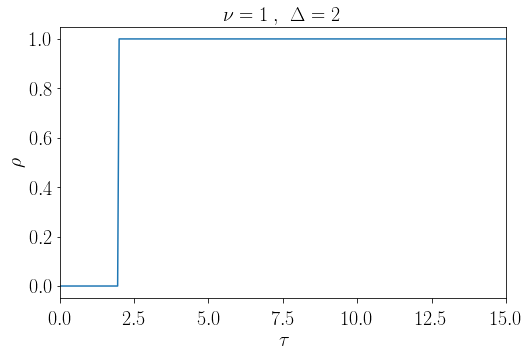

In [60]:
plt.plot(tau_vec,RHO_)
plt.xlabel(r'$\tau')
plt.ylabel(r'$\rho$')
plt.xlim(0,tau_max)

plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

        

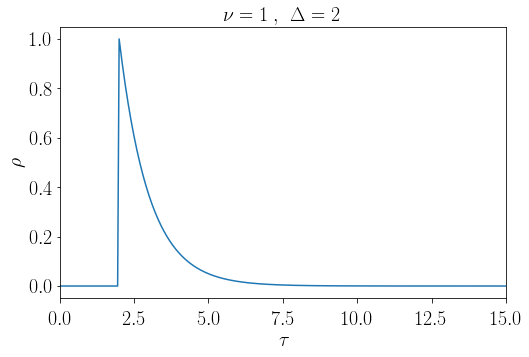

In [61]:
plt.plot(tau_vec,P_)
plt.xlabel(r'$\tau')
plt.ylabel(r'$\rho$')
plt.xlim(0,tau_max)

plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

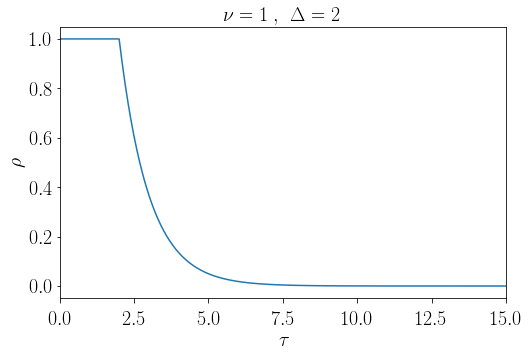

In [62]:


plt.plot(tau_vec,S_)
plt.xlabel(r'$\tau')
plt.ylabel(r'$\rho$')
plt.xlim(0,tau_max)

plt.title(r'$ \nu= {}\:,\:\: \Delta={}$'.format(nu,d))

In [63]:
def eigenvalue(n,nu,d):
    return (1/d)*sc.special.lambertw(d*nu*np.exp(nu*d), k=n)-nu

In [111]:
def psi0phi0(n,nu,d):
    l=eigenvalue(n,nu,d)
    return (nu+l)/(d*(nu+l)+1)

# Non Constante Input   a_1(t)=U+iV

## omega

In [246]:
omega_vec=np.logspace(-1,1, num=20)
err_2_vec=np.zeros(omega_vec.shape)

In [247]:
def err_2(A_n,A_m):
    lenght2=int(len(A_n)/2)
    return  np.sum((A_n[lenght2:]-A_m[lenght2:])**2)/len(A_n[lenght2:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


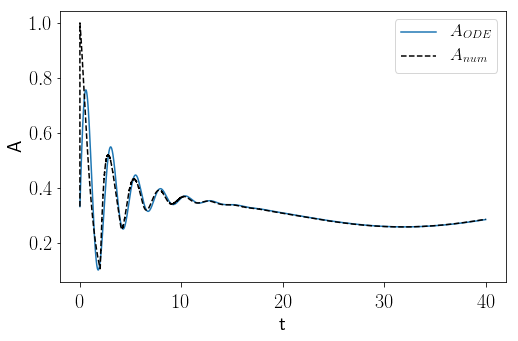

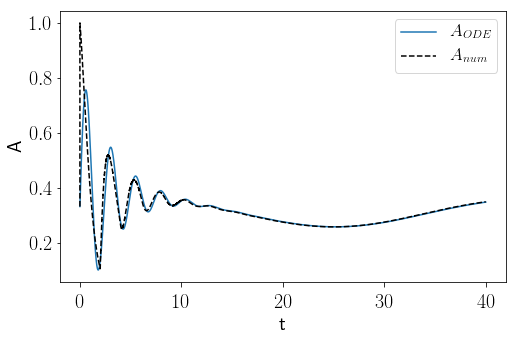

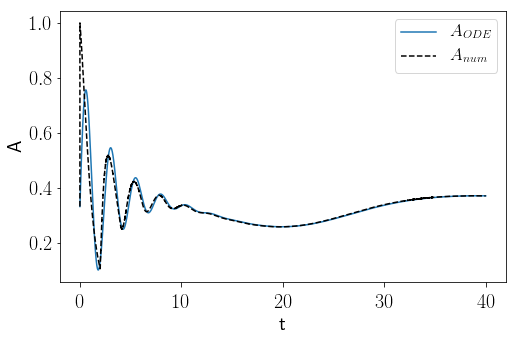

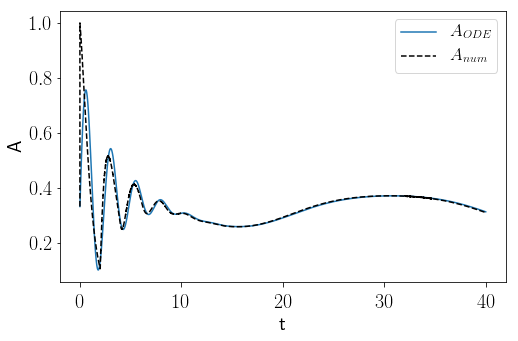

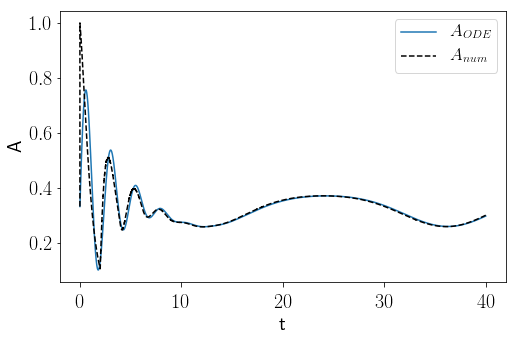

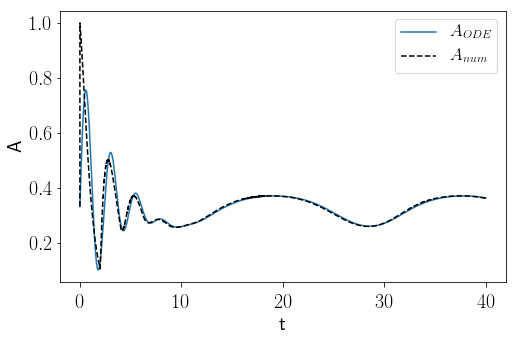

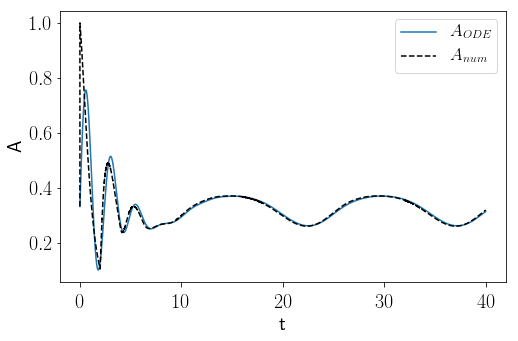

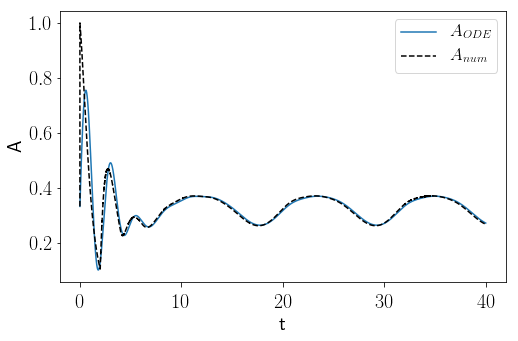

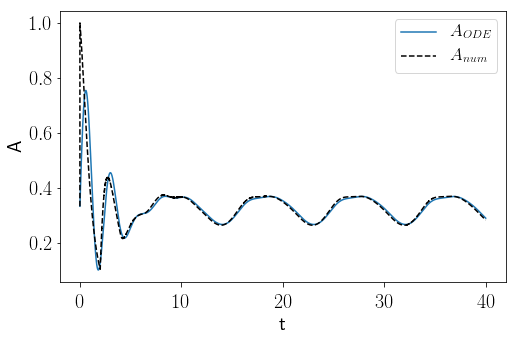

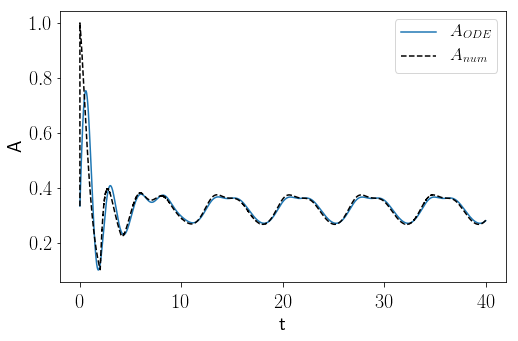

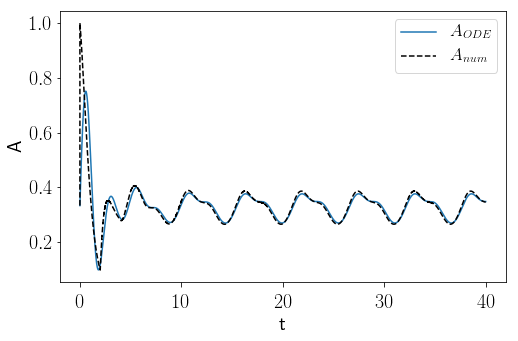

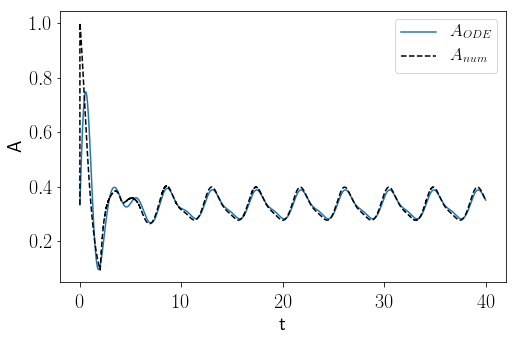

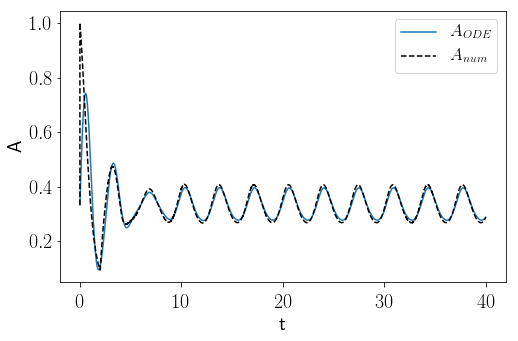

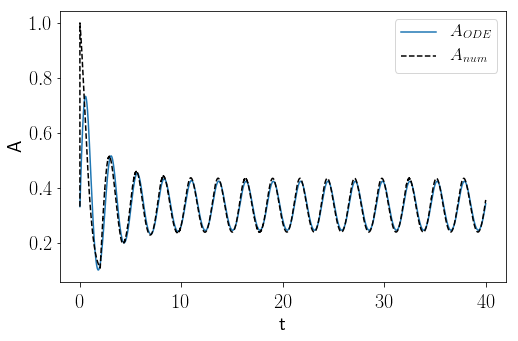

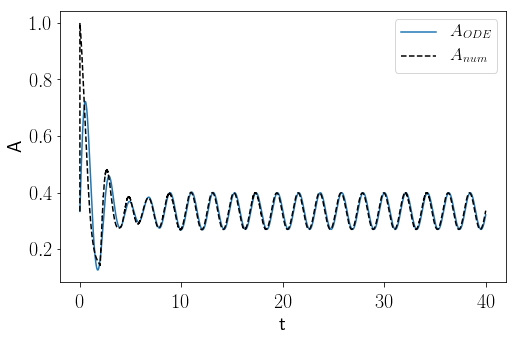

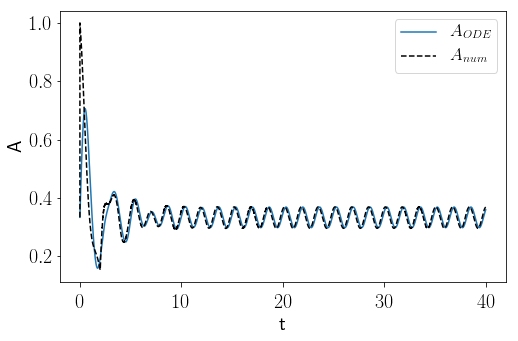

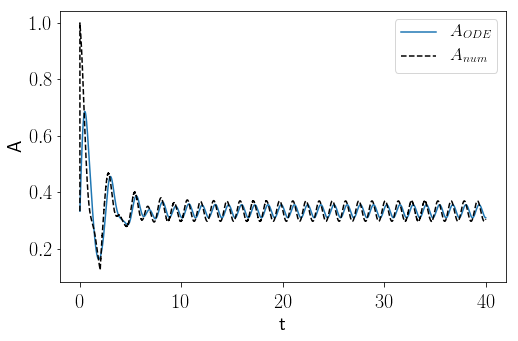

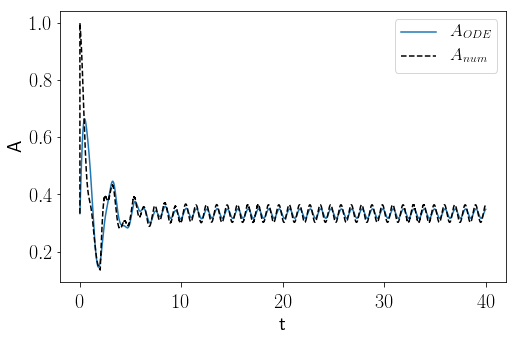

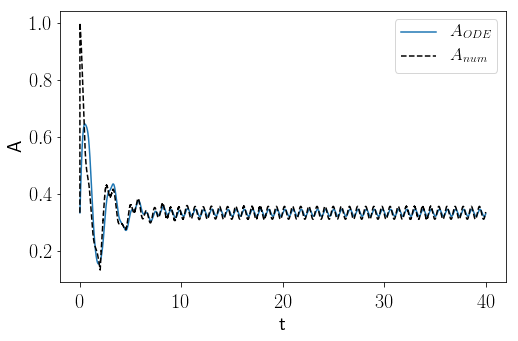

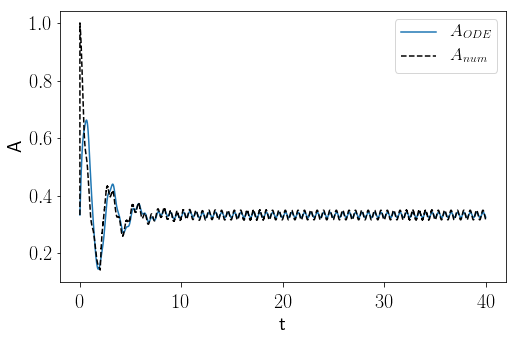

In [248]:
#MU 
mu_0=1.5
def mu(t):
    return  mu_0


for i_o, omega in enumerate(omega_vec):
    print(i_o)
    #REFRACTORINESS
    d=2

    #TIME PARAMETER
    dt=0.001

    t_max=40
    N_sim=int(t_max/dt)
    tsim=[i*dt for i in range(N_sim)]


    #NU PARAMETER
    beta=0.5
    nu_max=2
    nu_0=nu_max/2


    # H PARMETER
    h=np.zeros((N_sim+1,1))
    h_0=mu_0
    h[0]=h_0
    tau_m=0.9
    epsilon=2
    
    def dnudt(d,i):
        nu=nu_max/(1+np.exp(-beta*(h[i]-h_0)))
        h_prime=1/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
        return beta*nu*h_prime/(1+np.exp(beta*(h[i]-h_0)))
    
    A=np.zeros((N_sim,1))

    l1=eigenvalue(1,nu_0,d)
    phi1_0=(nu_0+l1)/(1+d*(nu_0+l1))
    
    U=np.zeros((N_sim+1,1))
    U[0]=-phi1_0.imag

    V=np.zeros((N_sim+1,1))
    V[0]=-phi1_0.real


    for i in range(N_sim):
        t=i*dt
    
        h[i+1]=h[i]+dt/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
        nu=nu_max/(1+np.exp(-beta*(h[i]-h_0)))
    
        l1=eigenvalue(1,nu,d)
        phi1_0= (nu+l1)/(1+d*(nu+l1))

    
        A_inf=nu/(d*nu+1)
    
    
        f=(l1+(Cnm(1,1,nu,d)+Cnm(1,-1,nu,d))*dnudt(d,i))
        g=(l1+(Cnm(1,1,nu,d)-Cnm(1,-1,nu,d))*dnudt(d,i))
    
    
        c10=Cnm(1,0,nu,d)*dnudt(d,i)
    
        K1=(f.real*U[i]-g.imag*V[i]+c10.real)
        L1=(g.real*V[i]+f.imag*U[i]+c10.imag)
    
        K2=(f.real*(U[i]+0.5*dt*K1)-g.imag*(V[i]+0.5*dt*L1)+c10.real)
        L2=(g.real*(V[i]+0.5*dt*L1)+f.imag*(U[i]+0.5*dt*K1)+c10.imag)
    
        K3=(f.real*(U[i]+0.5*dt*K2)-g.imag*(V[i]+0.5*dt*L2)+c10.real)
        L3=(g.real*(V[i]+0.5*dt*L2)+f.imag*(U[i]+0.5*dt*K2)+c10.imag)
    
        K4=(f.real*(U[i]+dt*K3)-g.imag*(V[i]+dt*L3)+c10.real)
        L4=(g.real*(V[i]+dt*L3)+f.imag*(U[i]+dt*K3)+c10.imag)
    
    
        U[i+1]=U[i]+dt/6*(K1+2*K2+2*K3+K4)
        V[i+1]=V[i]+dt/6*(L1+2*L2+2*L3+L4)
         
    
        A[i]=A_inf+2*(U[i]*phi1_0.real-V[i]*phi1_0.imag)
        
        
    #integral    
    tsim_num=[i*dt for i in range(N_sim)]

    h=np.zeros((N_sim+1,1))
    h[0]=h_0

    A_wc=np.zeros((N_sim,1))
    A_wc[0]=nu_0/(1+d*nu_0)


    for i in range(N_sim-1):
    
        t=i*dt
    
        jstart=int(np.floor((t-d)/dt))
    
        if jstart<0:
            jstart=0
    
      
        h[i+1]=h[i]+dt/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
    
        nu=nu_max/(1+np.exp(-beta*(h[i+1]-h_0)))
    
        A_wc[i+1]=nu*(1-np.sum(A_wc[jstart:i+1]*dt))
    
    plt.figure()
    plt.plot(tsim,A,label='$A_{ODE}$')
    plt.plot(tsim_num,A_wc,label='$A_{num}$',c='k',ls='--')
    plt.legend()
    plt.ylabel('A')
    plt.xlabel('t')
    
    
    err_2_vec[i_o]=err_2(A_wc,A)
    

In [249]:
omega_search = {'omega_vec': omega_vec,
                'err_2_vec': err_2_vec
              }

output = open('omega_search.pkl', 'wb')

pickle.dump(omega_search , output)

output.close()

In [250]:
pkl_file = open('omega_search.pkl', 'rb')

omega_search = pickle.load(pkl_file)

pkl_file.close()

omega_vec=omega_search['omega_vec']
err_2_vec=omega_search['err_2_vec']

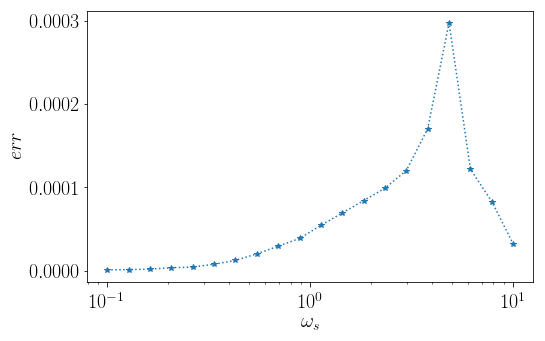

In [251]:
plt.semilogx(omega_vec,err_2_vec,marker='*',ls=':')
plt.xlabel(r'$\omega_s$')
plt.ylabel(r'$err$')


## epsilon

In [277]:
#epsilon_vec=np.linspace(0.1,50, num=10)
epsilon_vec=np.copy([1,2,5,10,20,40,80,160])

err_2_vec=np.zeros(epsilon_vec.shape)

In [278]:
#MU 
mu_0=1.5
def mu(t):
    return  mu_0


for i_o, epsilon in enumerate(epsilon_vec):
    print(i_o)
    #REFRACTORINESS
    d=2

    #TIME PARAMETER
    dt=0.001

    t_max=40
    N_sim=int(t_max/dt)
    tsim=[i*dt for i in range(N_sim)]


    #NU PARAMETER
    beta=0.5
    nu_max=2
    nu_0=nu_max/2


    # H PARMETER
    h=np.zeros((N_sim+1,1))
    h_0=mu_0
    h[0]=h_0
    tau_m=0.9
    omega=10
    
    def dnudt(d,i):
        nu=nu_max/(1+np.exp(-beta*(h[i]-h_0)))
        h_prime=1/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
        return beta*nu*h_prime/(1+np.exp(beta*(h[i]-h_0)))
    
    A=np.zeros((N_sim,1))

    l1=eigenvalue(1,nu_0,d)
    phi1_0=(nu_0+l1)/(1+d*(nu_0+l1))
    
    U=np.zeros((N_sim+1,1))
    U[0]=-phi1_0.imag

    V=np.zeros((N_sim+1,1))
    V[0]=-phi1_0.real


    for i in range(N_sim):
        t=i*dt
    
        h[i+1]=h[i]+dt/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
        nu=nu_max/(1+np.exp(-beta*(h[i]-h_0)))
    
        l1=eigenvalue(1,nu,d)
        phi1_0= (nu+l1)/(1+d*(nu+l1))

    
        A_inf=nu/(d*nu+1)
    
    
        f=(l1+(Cnm(1,1,nu,d)+Cnm(1,-1,nu,d))*dnudt(d,i))
        g=(l1+(Cnm(1,1,nu,d)-Cnm(1,-1,nu,d))*dnudt(d,i))
    
    
        c10=Cnm(1,0,nu,d)*dnudt(d,i)
    
        K1=(f.real*U[i]-g.imag*V[i]+c10.real)
        L1=(g.real*V[i]+f.imag*U[i]+c10.imag)
    
        K2=(f.real*(U[i]+0.5*dt*K1)-g.imag*(V[i]+0.5*dt*L1)+c10.real)
        L2=(g.real*(V[i]+0.5*dt*L1)+f.imag*(U[i]+0.5*dt*K1)+c10.imag)
    
        K3=(f.real*(U[i]+0.5*dt*K2)-g.imag*(V[i]+0.5*dt*L2)+c10.real)
        L3=(g.real*(V[i]+0.5*dt*L2)+f.imag*(U[i]+0.5*dt*K2)+c10.imag)
    
        K4=(f.real*(U[i]+dt*K3)-g.imag*(V[i]+dt*L3)+c10.real)
        L4=(g.real*(V[i]+dt*L3)+f.imag*(U[i]+dt*K3)+c10.imag)
    
    
        U[i+1]=U[i]+dt/6*(K1+2*K2+2*K3+K4)
        V[i+1]=V[i]+dt/6*(L1+2*L2+2*L3+L4)
         
    
        A[i]=A_inf+2*(U[i]*phi1_0.real-V[i]*phi1_0.imag)
        
        
    #integral    
    tsim_num=[i*dt for i in range(N_sim)]

    h=np.zeros((N_sim+1,1))
    h[0]=h_0

    A_wc=np.zeros((N_sim,1))
    A_wc[0]=nu_0/(1+d*nu_0)


    for i in range(N_sim-1):
    
        t=i*dt
    
        jstart=int(np.floor((t-d)/dt))
    
        if jstart<0:
            jstart=0
    
      
        h[i+1]=h[i]+dt/tau_m*(-h[i]+mu(i*dt)+epsilon*np.cos(omega*i*dt))
    
        nu=nu_max/(1+np.exp(-beta*(h[i+1]-h_0)))
    
        A_wc[i+1]=nu*(1-np.sum(A_wc[jstart:i+1]*dt))
    
    #plt.figure()
    #plt.plot(tsim,A,label='$A_{ODE}$')
    #plt.plot(tsim_num,A_wc,label='$A_{num}$',c='k',ls='--')
    #plt.legend()
    #plt.ylabel('A')
    #plt.xlabel('t')
    
    
    err_2_vec[i_o]=err_2(A_wc,A)
    

0
1
2
3
4
5
6
7


In [279]:
epsilon_search = {'epsilon_vec': epsilon_vec,
                'err_2_vec': err_2_vec
              }

output = open('epsilon_search.pkl', 'wb')

pickle.dump(epsilon_search , output)

output.close()

In [280]:
pkl_file = open('epsilon_search.pkl', 'rb')

epsilon_search = pickle.load(pkl_file)

pkl_file.close()

epsilon_vec=epsilon_search['epsilon_vec']
err_2_vec=epsilon_search['err_2_vec']

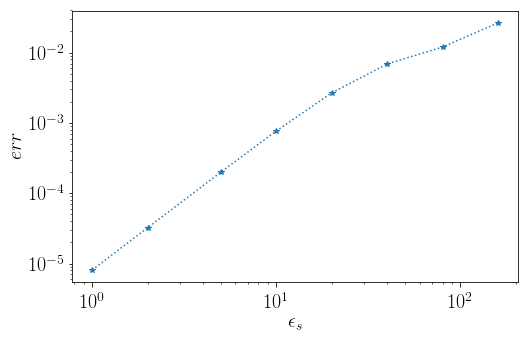

In [283]:
plt.loglog(epsilon_vec,err_2_vec,marker='*',ls=':')
plt.xlabel(r'$\epsilon_s$')
plt.ylabel(r'$err$')


(20, 30)

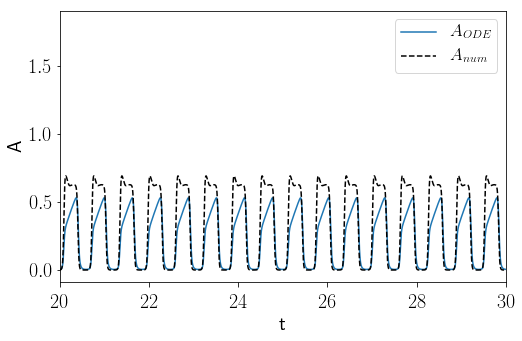

In [285]:
plt.figure()
plt.plot(tsim,A,label='$A_{ODE}$')
plt.plot(tsim_num,A_wc,label='$A_{num}$',c='k',ls='--')
plt.legend()
plt.ylabel('A')
plt.xlabel('t')
plt.xlim(20,30)